### Campaign for selling personal loans.

This case is about a bank (Thera Bank) which has a growing customer base. Majority of these customers are liability customers (depositors) with varying size of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.

The department wants to build a model that will help them identify the potential customers who have higher probability of purchasing the loan. This will increase the success ratio while at the same time reduce the cost of the campaign.

The file Bank.xls contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

1. Read the column description and ensure you understand each attribute well
2. Study the data distribution in each attribute, share your findings. (5 points)
3. Get the target column distribution. Your comments
4. Split the data into training and test set in the ratio of 70:30 respectively
5. Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a liability customer buying personal loans (15 points)
6. Print the confusion matrix for all the above models (5 points)
7. Give your reasoning on which is the best model in this case and why it performs better? (5 points)

In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pt
import seaborn as sns

## Question 1

Read the column description and ensure you understand each attribute well

In [120]:
bank_raw_df= pd.read_csv("Bank_Personal_Loan_Modelling.csv")
bank_raw_df.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


## Question 2

Study the data distribution in each attribute, share your findings. (5 points)

In [121]:
bank_raw_df.shape

(5000, 14)

In [122]:
bank_raw_df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [123]:
bank_raw_df.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [124]:
bank_df= bank_raw_df.copy()

In [125]:
bank_df=bank_df.drop(["ID","ZIP Code"], axis=1)

In [126]:
print (bank_df.isna().sum())
print('So no NAN value or missing value present.')

Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64
So no NAN value or missing value present.


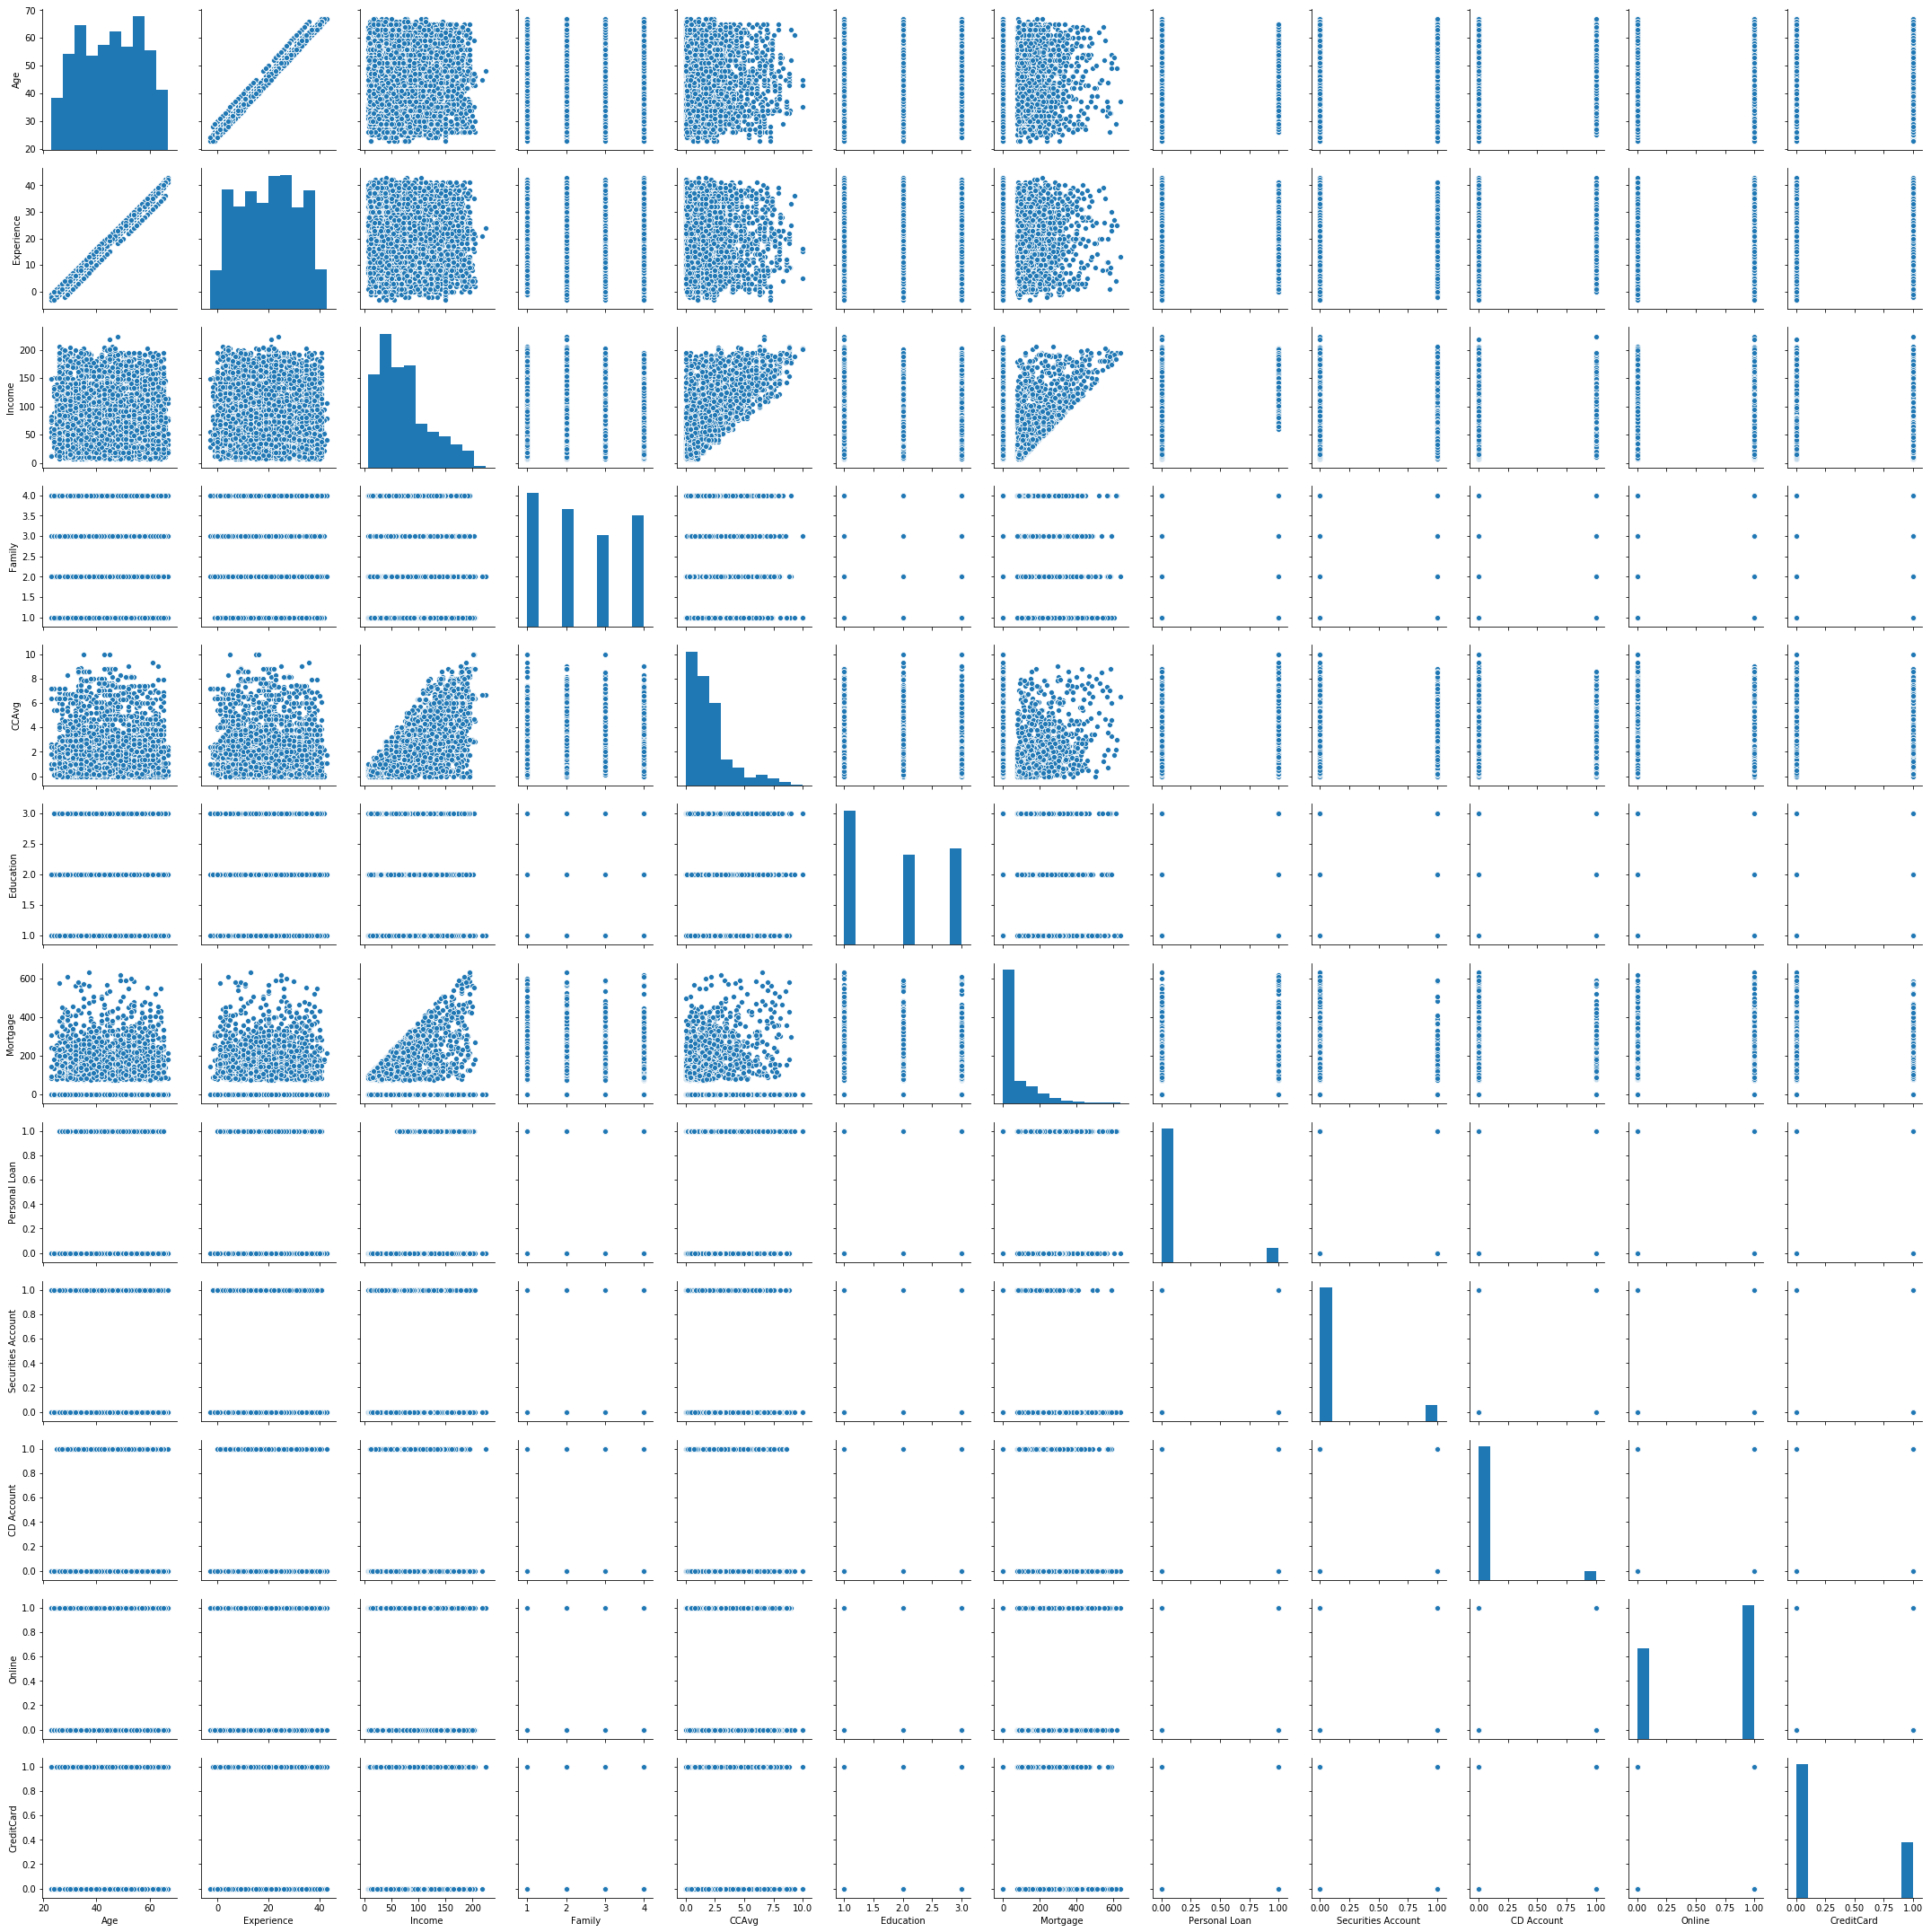

In [127]:
sns.pairplot(bank_df)

## Question 3

Get the target column distribution. Your comments

   Personal Loan  count   prop
0              0   4520  0.904
1              1    480  0.096


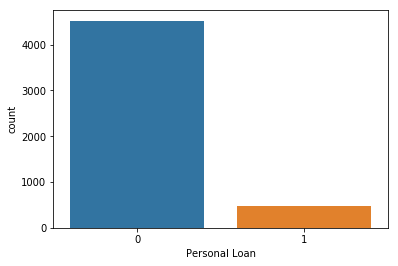

In [128]:
## Target Variable Frequency Distribution
freq = bank_df['Personal Loan'].value_counts().to_frame()
freq.reset_index(inplace=True)
freq.columns = [freq.columns[1], 'count']
freq['prop'] = freq['count'] / sum(freq['count'])
print (freq)
sns.countplot(bank_df['Personal Loan'])

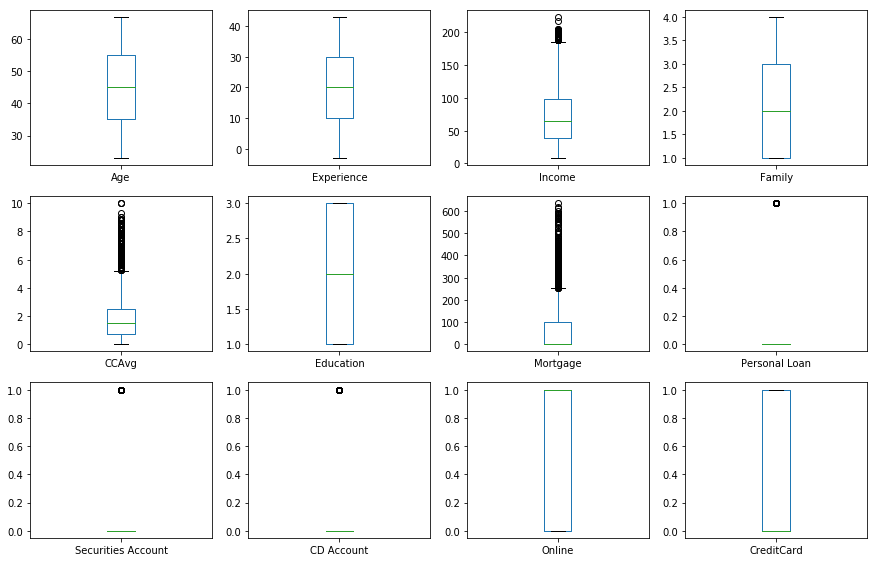

In [129]:
# box and whisker plots
bank_df.plot(kind='box', subplots=True,layout = (6,4),sharex=False, sharey=False,figsize=(15,20))
pt.show()

###### So the income variable has got outliers hence removing those with max value of income column. Similary for Mortage and CCAvg

{'whiskers': [<matplotlib.lines.Line2D at 0x1dc2276be48>,
 'caps': [<matplotlib.lines.Line2D at 0x1dc22771b00>,
 'boxes': [<matplotlib.lines.Line2D at 0x1dc2276bcf8>],
 'medians': [<matplotlib.lines.Line2D at 0x1dc22776390>],
 'fliers': [<matplotlib.lines.Line2D at 0x1dc227767b8>],
 'means': []}

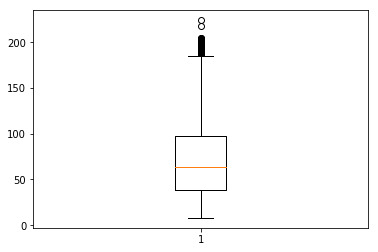

In [130]:
#Checking the outliers for outlier treatment.
pt.boxplot(bank_df["Income"])

In [131]:
bank_df['Income']=bank_df['Income'].map(lambda x: 185 if x>185 else x)
bank_df['Income'].describe()

count    5000.000000
mean       73.588600
std        45.555263
min         8.000000
25%        39.000000
50%        64.000000
75%        98.000000
max       185.000000
Name: Income, dtype: float64

In [132]:
bank_df['Mortgage']=bank_df['Mortgage'].map(lambda x: 250 if x>250 else x)
bank_df['Mortgage'].describe()

count    5000.0000
mean       50.3472
std        82.6477
min         0.0000
25%         0.0000
50%         0.0000
75%       101.0000
max       250.0000
Name: Mortgage, dtype: float64

In [134]:
bank_df['CCAvg']=bank_df['CCAvg'].map(lambda x: 5 if x>5 else x)
bank_df['CCAvg'].describe()

count    5000.000000
mean        1.817618
std         1.420930
min         0.000000
25%         0.700000
50%         1.500000
75%         2.500000
max         5.000000
Name: CCAvg, dtype: float64

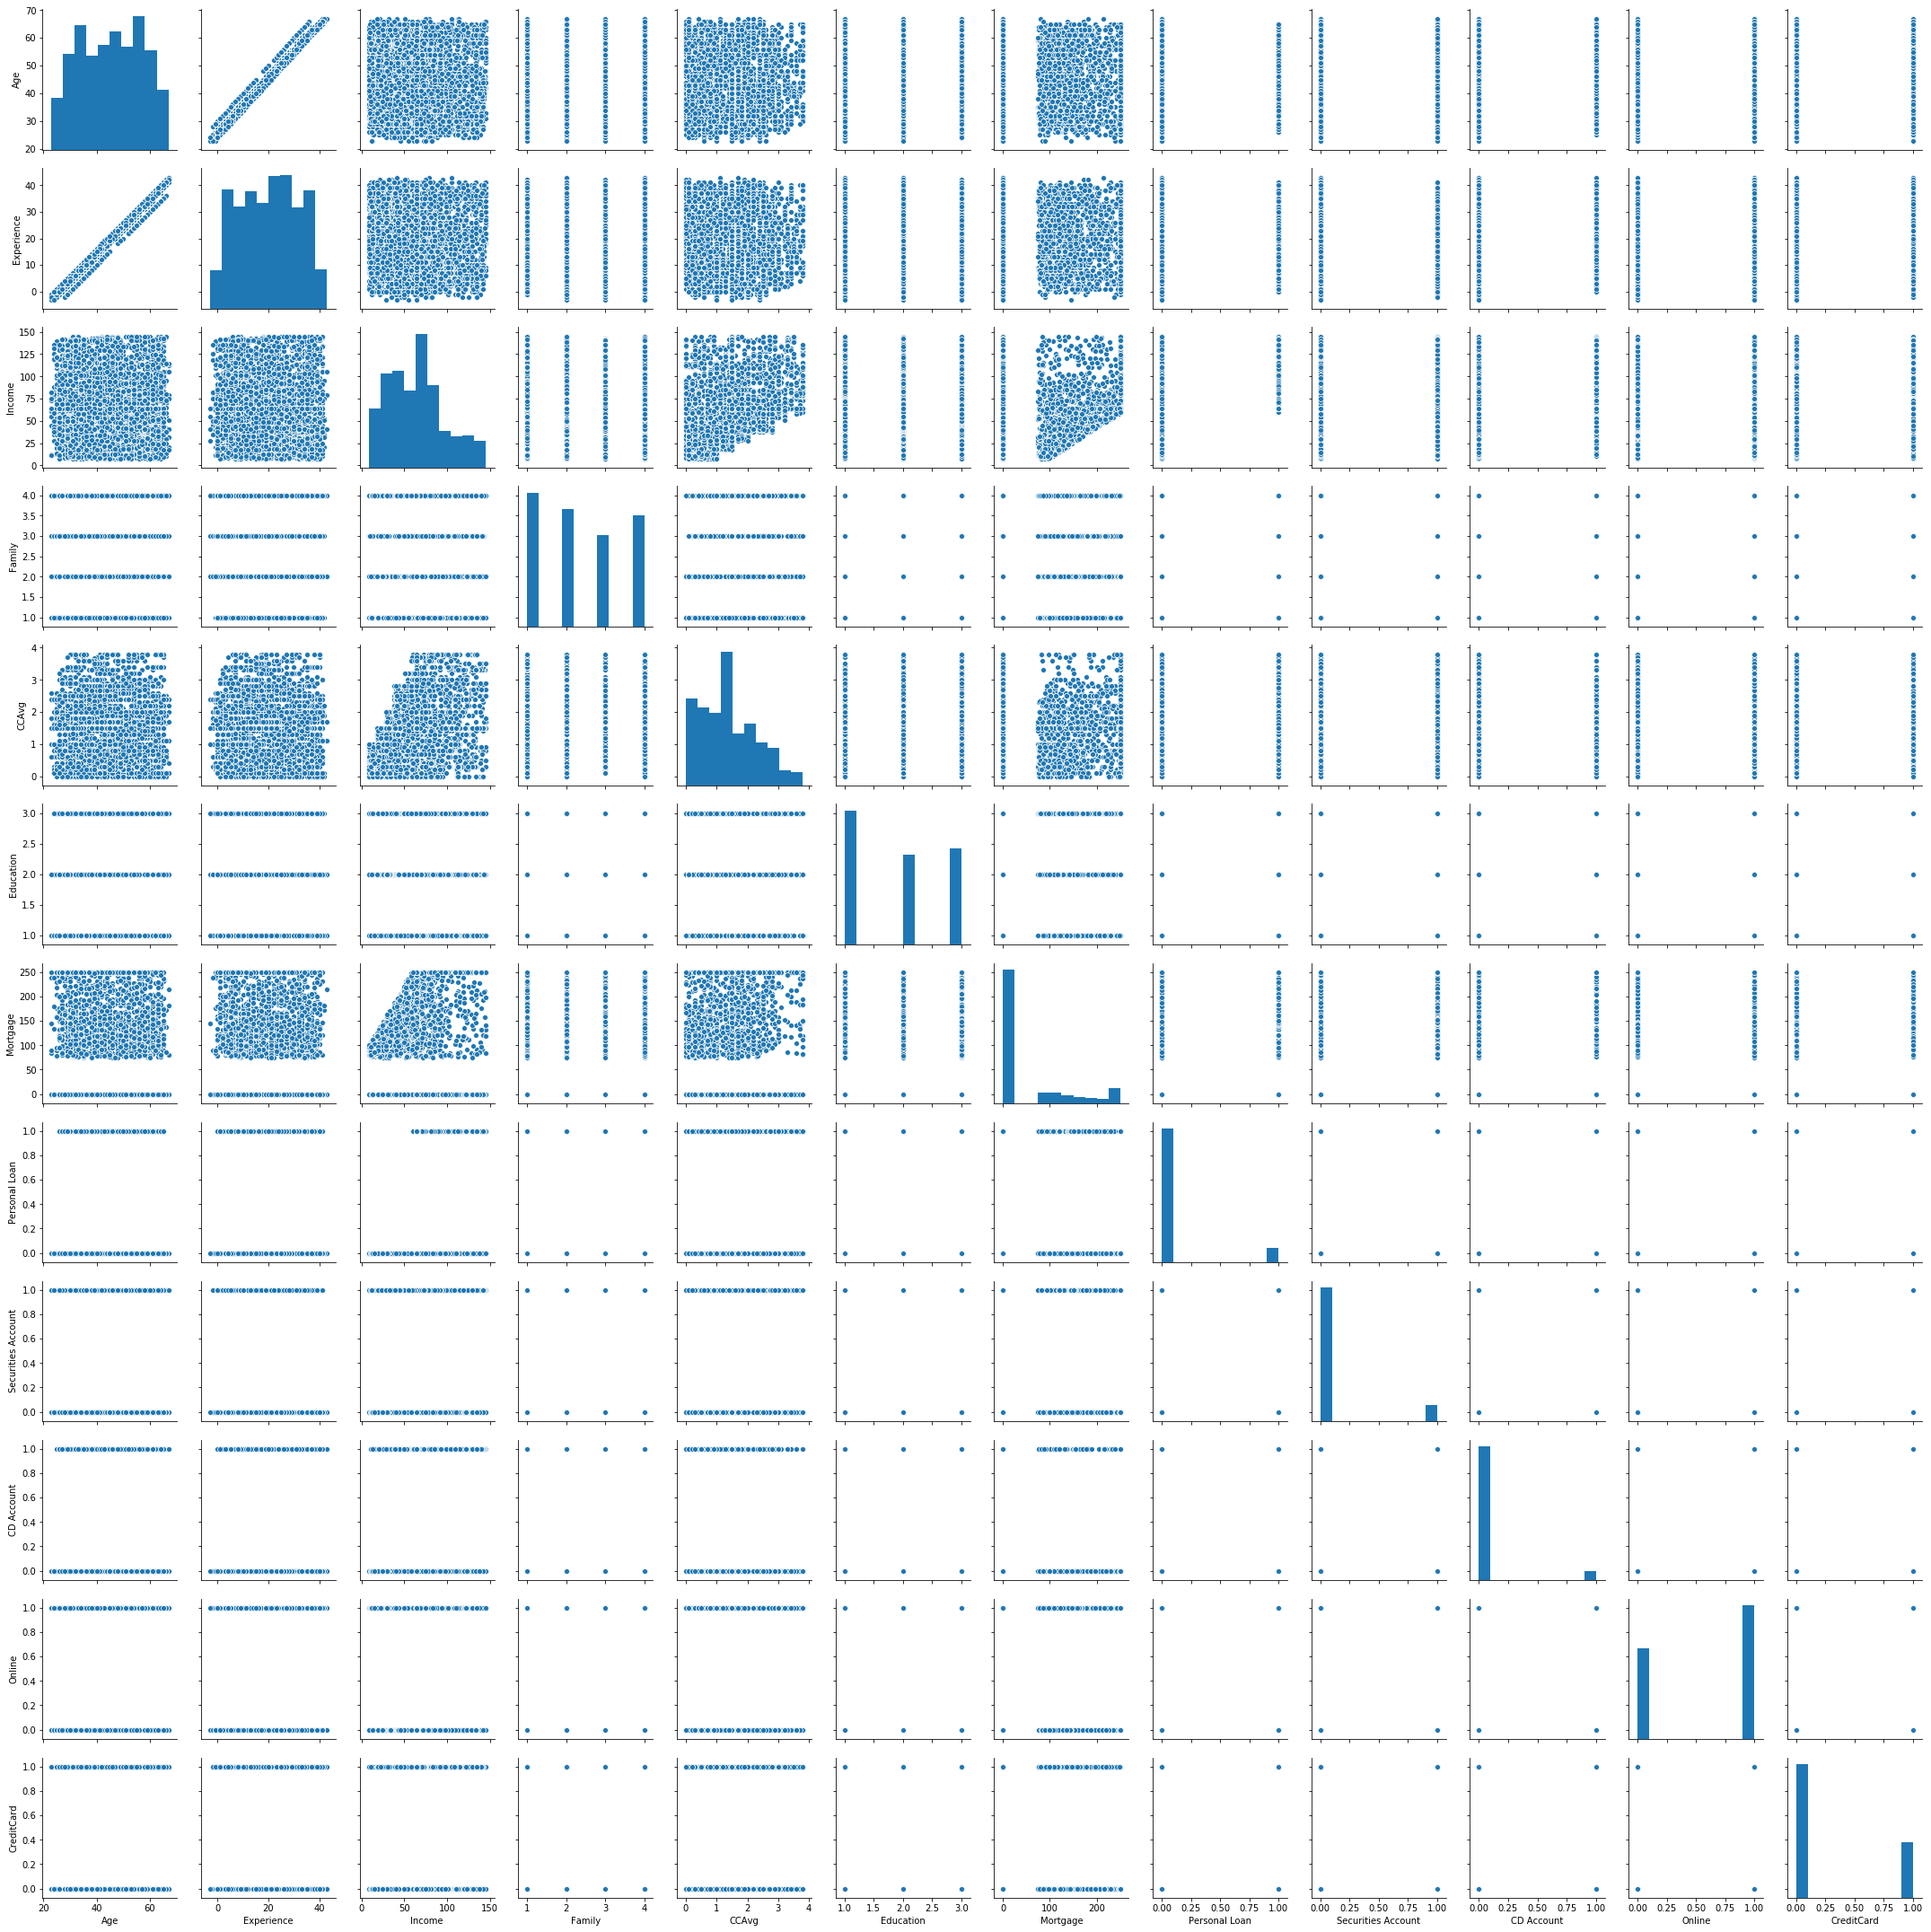

In [34]:
#Checking the relationship of all the independent/predicted variables using scatter plot/pairplot
sns.pairplot(bank_df)

##### From the above plot we can see that age and Experience are highly correlated. Rest no one is correlated to each other.

In [38]:
bank_df.corr()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.994215,-0.049555,-0.046418,-0.026940,0.041334,-0.011986,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.994215,1.000000,-0.042344,-0.052563,-0.028567,0.013152,-0.010529,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.049555,-0.042344,1.000000,-0.118949,0.371517,-0.166812,0.090785,0.294792,0.009381,0.078767,0.000902,-0.003380
Family,-0.046418,-0.052563,-0.118949,1.000000,-0.021633,0.064929,-0.010514,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.026940,-0.028567,0.371517,-0.021633,1.000000,-0.046024,0.041034,0.163933,0.013859,0.042545,-0.014406,0.000329
Education,0.041334,0.013152,-0.166812,0.064929,-0.046024,1.000000,-0.021710,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.011986,-0.010529,0.090785,-0.010514,0.041034,-0.021710,1.000000,0.092047,-0.005574,0.068880,-0.007198,-0.003466
Personal Loan,-0.007726,-0.007413,0.294792,0.061367,0.163933,0.136722,0.092047,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.000436,-0.001232,0.009381,0.019994,0.013859,-0.010812,-0.005574,0.021954,1.000000,0.317034,0.012627,-0.015028
CD Account,0.008043,0.010353,0.078767,0.014110,0.042545,0.013934,0.068880,0.316355,0.317034,1.000000,0.175880,0.278644


##### The correlation between age and Experience is 99.42%.

In [37]:
#Getting percentile distribution
bank_df["Age"].quantile([0.01,0.05,0.1,
     0.25,0.5,0.75,0.9,0.95,0.99,1])

0.01    25.0
0.05    27.0
0.10    30.0
0.25    35.0
0.50    45.0
0.75    55.0
0.90    61.0
0.95    63.0
0.99    65.0
1.00    67.0
Name: Age, dtype: float64

## Question 4

Split the data into training and test set in the ratio of 70:30 respectively

In [136]:
bank_df.rename(columns={'Personal Loan':'Personal_Loan','ZIP Code':'ZIP_Code','CD Account': 'CD_Account','Securities Account':'Securities_Account'},inplace=True)
bank_df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [137]:
X = bank_df.drop('Personal_Loan', axis=1)
y = bank_df['Personal_Loan']

train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.70, test_size=0.30, random_state=123)

## Question 5, 6, 7

5. Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a liability customer buying personal loans (15 points)
6. Print the confusion matrix for all the above models (5 points)
7. Give your reasoning on which is the best model in this case and why it performs better? (5 points)

## Logistic Regression Method

In [138]:
#Model development
#spliting into development, validation and hold-out sample
mydata = bank_df.copy()
mydata_dev, mydata_val, mydata_holdout = np.split(
        mydata.sample(frac=1, random_state=1212), 
        [int(.5*len(mydata)), 
         int(.8*len(mydata))]
        )

(len(mydata_dev), len(mydata_val), len(mydata_holdout))

(2500, 1500, 1000)

In [139]:
print(round(sum(mydata_dev['Personal_Loan'])*100/len(mydata_dev),1),
    round(sum(mydata_val['Personal_Loan'])*100/len(mydata_val),1),
    round(sum(mydata_holdout['Personal_Loan'])*100/len(mydata_holdout),1))

9.6 9.2 10.3


In [140]:
import statsmodels.formula.api as sm
import statsmodels.api

## Running regression with all the variables
mylogit = sm.glm(formula = """Personal_Loan ~ Income + Family + CCAvg + Education 
        + Mortgage + Securities_Account + CD_Account + Online""" , 
        data = mydata_dev, family=statsmodels.api.families.Binomial()).fit()
mylogit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:          Personal_Loan   No. Observations:                 2500
Model:                            GLM   Df Residuals:                     2491
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -305.27
Date:                Sun, 03 Feb 2019   Deviance:                       610.53
Time:                        22:35:39   Pearson chi2:                 2.81e+03
No. Iterations:                     8   Covariance Type:             nonrobust
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            -14.6872      0.883    -16.642      0.000     -16.417     -12.957
Income                 0.0570      0.004     14.498      0.000       0.049       0.065
Family                 0.7231      0.107      6.738      0.000       0.513       0.933
CCAvg                  0.3366      0.078      4.302      0.000       0.183       0.490
Education              1.7847      0.166     10.759      0.000       1.460       2.110
Mortgage               0.0007      0.001      0.675      0.500      -0.001       0.003
Securities_Account     0.0910      0.401      0.227      0.821      -0.696       0.878
CD_Account             2.9085      0.400      7.271      0.000       2.124       3.693
Online                -0.5861      0.225     -2.603      0.009      -1.027      -0.145
======================================================================================
"""

##### Dropping Securities_Account and Mortgage since its P value is too high

In [141]:
import statsmodels.formula.api as sm
import statsmodels.api

## Running regression with all the variables
mylogit = sm.glm(formula = """Personal_Loan ~ Income + Family + CCAvg + Education 
         + CD_Account + Online """ , 
        data = mydata_dev, family=statsmodels.api.families.Binomial()).fit()
mylogit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:          Personal_Loan   No. Observations:                 2500
Model:                            GLM   Df Residuals:                     2493
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -305.53
Date:                Sun, 03 Feb 2019   Deviance:                       611.06
Time:                        22:36:20   Pearson chi2:                 2.82e+03
No. Iterations:                     8   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -14.6195      0.871    -16.779      0.000     -16.327     -12.912
Income         0.0571      0.004     14.644      0.000       0.049       0.065
Family         0.7208      0.107      6.754      0.000       0.512       0.930
CCAvg          0.3335      0.078      4.277      0.000       0.181       0.486
Education      1.7824      0.166     10.761      0.000       1.458       2.107
CD_Account     2.9593      0.356      8.303      0.000       2.261       3.658
Online        -0.5944      0.224     -2.658      0.008      -1.033      -0.156
==============================================================================
"""

##### After adding coef and std err of each variable, their sign does not change. Hence, the Betas are normal

In [142]:
#VIF Factor
def VIF(formula,data):
    from patsy import dmatrices
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    y , X = dmatrices(formula,data = data,return_type="dataframe")
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) 
        for i in range(X.shape[1])]
    return(vif.round(1))

vif=VIF("""Personal_Loan ~ Income + Family + CCAvg + Education 
        + Mortgage + Securities_Account + CD_Account + Online""",bank_df_dev)
vif     #Multicolinearity is present since vif >2 for age and Experience

,Variable,VIF
0,Intercept,19.1
1,Income,1.2
2,Family,1.0
3,CCAvg,1.2
4,Education,1.0
5,Mortgage,1.0
6,Securities_Account,1.1
7,CD_Account,1.2
8,Online,1.0


##### VIF is less than 2, hence the model is robust now

In [143]:
## Predicting Probabilities
mydata_dev["prob"] = mylogit.predict(mydata_dev)## Classification
mydata_dev.prob.quantile(
  [0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99,1])

0.01    0.000016
0.05    0.000070
0.10    0.000156
0.25    0.000753
0.50    0.004589
0.75    0.043509
0.90    0.311563
0.95    0.760031
0.99    0.989015
1.00    0.999438
Name: prob, dtype: float64

In [144]:
mydata_dev["class"] = mydata_dev["prob"].map(
        lambda x: 1 if x > mydata_dev.prob.quantile(0.95) else 0)

mydata_dev["class"]

1622    0
802     0
1941    0
2414    0
4237    0
3829    0
3882    0
3712    0
2623    0
1785    0
1175    0
3332    0
2534    0
2109    1
2877    0
4598    0
3727    0
963     0
4582    0
3761    0
361     0
2765    0
522     0
3486    0
2084    0
2484    0
1320    0
4151    0
3697    0
118     0
       ..
4548    0
4777    0
2703    0
231     0
4439    0
4477    0
1921    0
610     0
2526    0
582     0
4336    0
79      0
4456    0
1292    1
3226    0
2022    0
2670    0
2659    0
3743    0
1984    0
2115    0
1109    0
2929    0
1183    0
1361    0
2979    0
1318    0
1805    0
2391    0
1222    0
Name: class, Length: 2500, dtype: int64

In [145]:
mydata_dev['decile']=pd.qcut(mydata_dev.prob, 10, labels=False)
## Rank Order Table and KS Statistics
def Response_Rate(X,y,Target):
    
    Rank=X.groupby('decile').apply(lambda x: pd.Series([
        np.min(x[y]),
        np.max(x[y]),
        np.mean(x[y]),
        np.size(x[y]),
        np.sum(x[Target]),
        np.size(x[Target][x[Target]==0]),
        ],
        index=(["min_prob","max_prob","avg_prob",
                "cnt","cnt_resp","cnt_non_resp"])
        )).reset_index()
    Rank=Rank.sort_values(by='decile',ascending=False)
    Rank["rrate"]=round(Rank["cnt_resp"]*100/Rank["cnt"],2)
    Rank["cum_resp"]=np.cumsum(Rank["cnt_resp"])
    Rank["cum_non_resp"]=np.cumsum(Rank["cnt_non_resp"])
    Rank["cum_resp_pct"]=round(Rank["cum_resp"]*100/np.sum(Rank["cnt_resp"]),2)
    Rank["cum_non_resp_pct"]=round(
            Rank["cum_non_resp"]*100/np.sum(Rank["cnt_non_resp"]),2)
    Rank["KS"] = round(Rank["cum_resp_pct"] - Rank["cum_non_resp_pct"],2)
    Rank
    return(Rank)

RRate = Response_Rate(mydata_dev,"prob","Personal_Loan")
RRate

,decile,min_prob,max_prob,avg_prob,cnt,cnt_resp,cnt_non_resp,rrate,cum_resp,cum_non_resp,cum_resp_pct,cum_non_resp_pct,KS
9,9,0.320668,0.999438,0.719695,250.0,174.0,76.0,69.6,174.0,76.0,72.80,3.36,69.44
8,8,0.069610,0.310551,0.160285,250.0,45.0,205.0,18.0,219.0,281.0,91.63,12.43,79.20
7,7,0.027511,0.069501,0.045122,250.0,13.0,237.0,5.2,232.0,518.0,97.07,22.91,74.16
6,6,0.010957,0.027507,0.017775,250.0,3.0,247.0,1.2,235.0,765.0,98.33,33.83,64.50
5,5,0.004599,0.010951,0.007124,250.0,1.0,249.0,0.4,236.0,1014.0,98.74,44.85,53.89
4,4,0.002300,0.004579,0.003261,250.0,1.0,249.0,0.4,237.0,1263.0,99.16,55.86,43.30
3,3,0.001094,0.002287,0.001600,250.0,1.0,249.0,0.4,238.0,1512.0,99.58,66.87,32.71
2,2,0.000487,0.001094,0.000759,250.0,1.0,249.0,0.4,239.0,1761.0,100.00,77.89,22.11
1,1,0.000156,0.000483,0.000309,250.0,0.0,250.0,0.0,239.0,2011.0,100.00,88.94,11.06
0,0,0.000005,0.000155,0.000070,250.0,0.0,250.0,0.0,239.0,2261.0,100.00,100.00,0.00


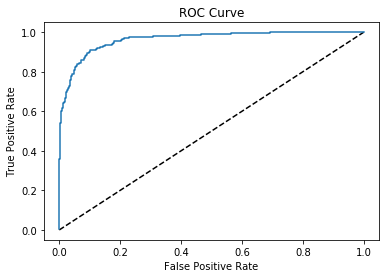

0.8057826081324404

In [146]:
#Roc_Curve and KS
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(mydata_dev["Personal_Loan"],mydata_dev["prob"] )
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

KS = (tpr - fpr).max()
KS

In [147]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(mydata_dev["Personal_Loan"],mydata_dev["prob"])
auc

0.963558909580128

In [149]:
#Confusion Matrix and Classification Accuracy
from sklearn.metrics import confusion_matrix, accuracy_score   
confusion_matrix = (
    {"conf_matx": confusion_matrix(mydata_dev['Personal_Loan'],mydata_dev["class"]),
     "accuracy": accuracy_score(mydata_dev['Personal_Loan'],mydata_dev["class"])
    })

print("confusion matrix \n" , confusion_matrix["conf_matx"], 
      "\n\nClassification accuracy ", confusion_matrix["accuracy"]
      )

confusion matrix 
 [[2257    4]
 [ 118  121]] 

Classification accuracy  0.9512


##### So with Logistic regression there is 95.12% chance that a liability customer will buy personal loans.

## K-NN Method

In [150]:
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from sklearn.preprocessing import Imputer
from sklearn.metrics import accuracy_score

In [151]:
kbankdf=pd.read_csv('Bank_Personal_Loan_Modelling.csv')
kbankdf.rename(columns={'Personal Loan':'Personal_Loan','ZIP Code':'ZIP_Code','CD Account': 'CD_Account','Securities Account':'Securities_Account'},inplace=True)
kbankdf.head()

,ID,Age,Experience,Income,ZIP_Code,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [152]:
## Target Variable Frequency Distribution
freq = kbankdf['Personal_Loan'].value_counts().to_frame()
freq.reset_index(inplace=True)
freq.columns = [freq.columns[1], 'count']
freq['prop'] = freq['count'] / sum(freq['count'])
freq

,Personal_Loan,count,prop
0,0,4520,0.904
1,1,480,0.096


In [153]:
target=kbankdf.pop('Personal_Loan')

In [155]:
#Dimentionality reduction is very imp step in knn since it cal dist with every variable which slows down the process. Hence, finding iv value for removing varibales
exec(open("iv_function.py").read())
iv = information_value(df = kbankdf,target = target)
iv

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:61: RuntimeWarning: divide by zero encountered in log
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:62: RuntimeWarning: divide by zero encountered in log


,VAR_NAME,IV,BINS
0,Income,2.604722,4
1,CCAvg,1.172301,3
2,CD_Account,0.615228,2
3,Education,0.086682,2
4,Family,0.059362,2
5,Mortgage,0.010016,2
6,ID,0.008476,4
7,Securities_Account,0.005172,2
8,Experience,0.001032,2
9,Age,0.000811,2


In [156]:
kbankdf=kbankdf.drop(labels=['Age','Online','CreditCard','ZIP_Code'],axis=1)

In [157]:
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore

predictor=(kbankdf.apply(zscore))

In [158]:
predictor.head()

,ID,Experience,Income,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account
0,-1.731704,-1.666078,-0.538229,1.397414,-0.193385,-1.049078,-0.555524,2.928915,-0.25354
1,-1.731012,-0.096330,-0.864109,0.525991,-0.250611,-1.049078,-0.555524,2.928915,-0.25354
2,-1.730319,-0.445163,-1.363793,-1.216855,-0.536736,-1.049078,-0.555524,-0.341423,-0.25354
3,-1.729626,-0.968413,0.569765,-1.216855,0.436091,0.141703,-0.555524,-0.341423,-0.25354
4,-1.728933,-1.055621,-0.625130,1.397414,-0.536736,0.141703,-0.555524,-0.341423,-0.25354


In [159]:
kbankdf.head()

,ID,Experience,Income,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account
0,1,1,49,4,1.6,1,0,1,0
1,2,19,34,3,1.5,1,0,1,0
2,3,15,11,1,1.0,1,0,0,0
3,4,9,100,1,2.7,2,0,0,0
4,5,8,45,4,1.0,2,0,0,0


In [160]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(predictor, target, test_size=0.3,random_state=10)
print ('X_train {}, \n y_train {}'.format(X_train.head(),y_train.head()))
print ('--------------------------------------------------------------------------------------------------')
print ('X_test {},\n y_test {}'.format(X_test.head(),y_test.head()))

X_train             ID  Experience    Income    Family     CCAvg  Education  Mortgage  \
2573  0.050922    1.211793  0.135258 -0.345432 -0.193385  -1.049078 -0.555524   
2066 -0.300338   -0.357955 -0.951011 -0.345432 -0.307836   0.141703 -0.555524   
2823  0.224127   -1.142829 -1.146539 -1.216855 -0.765637   1.332484 -0.555524   
2389 -0.076557   -1.666078 -0.712032 -1.216855 -0.021710   1.332484 -0.555524   
2702  0.140296   -0.183538  1.525682 -0.345432  2.381745  -1.049078  0.998010   

      Securities_Account  CD_Account  
2573           -0.341423    -0.25354  
2066           -0.341423    -0.25354  
2823            2.928915    -0.25354  
2389           -0.341423    -0.25354  
2702           -0.341423    -0.25354  , 
 y_train 2573    0
2066    0
2823    0
2389    0
2702    0
Name: Personal_Loan, dtype: int64
--------------------------------------------------------------------------------------------------
X_test             ID  Experience    Income    Family     CCAvg  Education  M

In [161]:
## Fit the model
from sklearn.grid_search import GridSearchCV

k = np.arange(21,115,2)
knn = KNeighborsClassifier(algorithm = 'kd_tree')
parameters = {'n_neighbors' : k}
##GS = GridSearchCV(knn, parameters, scoring = my_auc, cv=10)
GS = GridSearchCV(knn, parameters, scoring = 'roc_auc', cv=10)

In [162]:
GS.fit(X_train, y_train)
print(GS.best_params_)
print(GS.best_score_) 

{'n_neighbors': 27}
0.9753676470588234


In [163]:
kbankdf['prob'] = pd.DataFrame(GS.predict_proba(kbankdf))[1]

In [164]:
kbankdf.head()

,ID,Experience,Income,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,prob
0,1,1,49,4,1.6,1,0,1,0,0.444444
1,2,19,34,3,1.5,1,0,1,0,0.740741
2,3,15,11,1,1.0,1,0,0,0,0.629630
3,4,9,100,1,2.7,2,0,0,0,0.407407
4,5,8,45,4,1.0,2,0,0,0,0.518519


AUC 0.7454157448377581


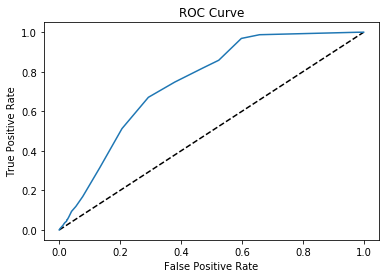

In [165]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(target,kbankdf["prob"])
print ('AUC',auc)
#Roc_Curve and KS
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(target,kbankdf["prob"])
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [166]:
predict=GS.predict(X_test)
predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [167]:
from sklearn.metrics import confusion_matrix
con_mat = confusion_matrix(y_test, predict)
con_mat

array([[1352,    8],
       [  75,   65]], dtype=int64)

In [168]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, predict)
print ('Model accuracy is',acc*100,'%')

Model accuracy is 94.46666666666667 %


## Naive Bayes Technique

#Since this is binomial model, we will use Bernoulli model

In [169]:
nbbankdf = bank_df

In [171]:
## Target Variable Frequency Distribution
freq = bank_df['Personal_Loan'].value_counts().to_frame()
freq.reset_index(inplace=True)
freq.columns = [freq.columns[1], 'count']
freq['prop'] = freq['count'] / sum(freq['count'])
freq

,Personal_Loan,count,prop
0,0,4520,0.904
1,1,480,0.096


In [172]:
from sklearn.naive_bayes import BernoulliNB
NB = BernoulliNB()
NB.fit(train_X, train_y)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [173]:
## Get the probability
tempdf = pd.DataFrame(NB.predict_proba(train_X))[1]
tempdf.isna().sum()

0

In [174]:
nbbankdf = pd.DataFrame(tempdf)

nbbankdf['prob'] = pd.DataFrame(tempdf)
nbbankdf['prob'].shape

(3500,)

In [175]:
nbbankdf['prob'] = np.where(nbbankdf['prob'] >= 0.096, 1, 0)
pd.DataFrame(nbbankdf['prob']).shape

(3500, 1)

In [176]:
#Confusion Matrix and Classification Accuracy
from sklearn.metrics import confusion_matrix, accuracy_score   
confusion_matrix = (
    {"conf_matx": confusion_matrix(train_y,nbbankdf['prob']),
     "accuracy": accuracy_score(train_y,nbbankdf['prob'])
    })

print("confusion matrix \n" , confusion_matrix["conf_matx"], 
      "\n\nclassification accuracy ", confusion_matrix["accuracy"]
      )

confusion matrix 
 [[3007  159]
 [ 236   98]] 

classification accuracy  0.8871428571428571


##### Since we got accuracy score for Logistic regression higher than remaining two models, it was the better one.(accuracies of naive bayes and knn are nearly equal.)